In [1]:
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.initializers import RandomUniform
from matplotlib import pyplot

Using TensorFlow backend.


In [2]:
# generate 2d classification dataset
X, Y = make_circles(n_samples=1000, noise=0.1, random_state=1)
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

In [3]:
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainY, testY = Y[:n_train], Y[n_train:]

In [4]:
# define model
init = RandomUniform(minval=0, maxval=1)
model = Sequential()
model.add(Dense(5, input_dim=2, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(5, activation='tanh', kernel_initializer=init))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))

W1218 05:23:05.056715 15952 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1218 05:23:05.077786 15952 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:529: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1218 05:23:05.082643 15952 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4420: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

W1218 05:23:05.291615 15952 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1218 05:23:05.304491 15952 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3645: The name tf.log is deprecated. Please use tf.math.log instead.

W1218 05:23:05.312391 15952 deprecation.py:323] From C:\Users\Lenovo\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
# fit model
history = model.fit(trainX, trainY, validation_data=(testX, testY),
                   epochs=500, verbose=0)

W1218 05:23:05.691563 15952 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1021: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



In [7]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainY, verbose=0)
_, test_acc = model.evaluate(testX, testY, verbose=0)

In [8]:
train_acc

0.7599999995231629

In [9]:
test_acc

0.7500000004768371

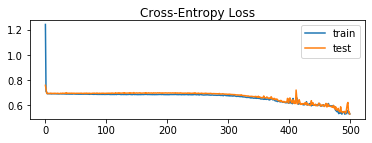

In [10]:
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

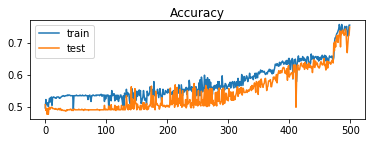

In [11]:
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['acc'], label='train')
pyplot.plot(history.history['val_acc'], label='test')
pyplot.legend()
pyplot.show()